# Prediction

## Read Data


In [266]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,10


In [267]:
df = pd.read_csv('velo.csv')

#url='https://docs.google.com/spreadsheets/d/1ssxsl9AIobDofXFohvwxqCPF0tn6dgXpixhiDzus0iE/export?format=csv&gid=59478853'
#path_target = "./velo.csv"
#df = pd.read_csv(url)


In [268]:
df.head()

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,Unnamed: 4,Remarque
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,12/03/2020,11:05:00,109.0,109.0,NaN,NaN
3,12/03/2020,14:30:00,441.0,441.0,NaN,NaN
4,13/03/2020,10:02:00,1921.0,385.0,NaN,NaN


In [269]:
df.tail(10)

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,Unnamed: 4,Remarque
1367,06/03/2021,09:16:00,71895.0,81.0,NaN,NaN
1368,06/03/2021,09:24:00,71910.0,96.0,NaN,NaN
1369,06/03/2021,10:01:00,71948.0,134.0,NaN,NaN
1370,06/03/2021,14:25:00,72377.0,563.0,NaN,NaN
1371,06/03/2021,18:08:00,72761.0,947.0,NaN,NaN
1372,07/03/2021,12:20:00,73146.0,233.0,NaN,NaN
1373,07/03/2021,12:58:00,73237.0,324.0,NaN,NaN
1374,07/03/2021,14:45:00,73319.0,406.0,NaN,NaN
1375,07/03/2021,18:15:00,73529.0,616.0,NaN,NaN
1376,08/03/2021,10:19:00,74035.0,414.0,NaN,NaN


On a juste besoin que des 4 premières colonnes, les deux dernières ne contiennent aucune information

In [270]:
df = df[['Date', 'Heure / Time', 'Vélos depuis le 1er janvier / Grand total', "Vélos ce jour / Today's total"]]
df.tail()

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
1372,07/03/2021,12:20:00,73146.0,233.0
1373,07/03/2021,12:58:00,73237.0,324.0
1374,07/03/2021,14:45:00,73319.0,406.0
1375,07/03/2021,18:15:00,73529.0,616.0
1376,08/03/2021,10:19:00,74035.0,414.0


On va renommer les colonnes du dataframe

In [271]:
df.rename(columns = {'Heure / Time': 'Time', 'Vélos depuis le 1er janvier / Grand total' : 'Total', "Vélos ce jour / Today's total" : "TodayTotal"}, inplace = True)

In [272]:
df.tail()

,Date,Time,Total,TodayTotal
1372,07/03/2021,12:20:00,73146.0,233.0
1373,07/03/2021,12:58:00,73237.0,324.0
1374,07/03/2021,14:45:00,73319.0,406.0
1375,07/03/2021,18:15:00,73529.0,616.0
1376,08/03/2021,10:19:00,74035.0,414.0


## Data Types 

In [273]:
df.dtypes

Date           object
Time           object
Total         float64
TodayTotal    float64
dtype: object

In [274]:
#df = df.replace({'/':''}, regex = True)

On va convertir le data type de 'Date' (object) en datetime type

In [275]:
df["Date"] = pd.to_datetime(df.Date)
#df['Time'] = df.astype({'Time': float})




In [276]:
df.dtypes

Date          datetime64[ns]
Time                  object
Total                float64
TodayTotal           float64
dtype: object

In [277]:
df.tail()

,Date,Time,Total,TodayTotal
1372,2021-07-03,12:20:00,73146.0,233.0
1373,2021-07-03,12:58:00,73237.0,324.0
1374,2021-07-03,14:45:00,73319.0,406.0
1375,2021-07-03,18:15:00,73529.0,616.0
1376,2021-08-03,10:19:00,74035.0,414.0


In [278]:
df.index = df['Date']

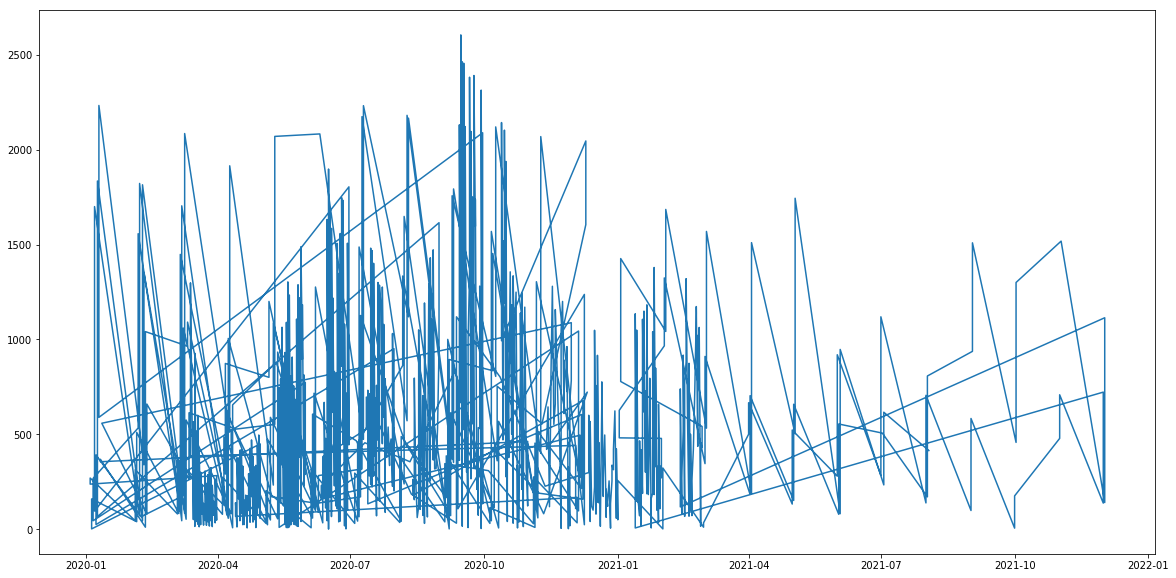

In [279]:
plt.plot(df["TodayTotal"], label='')
#plt.xlim([1200, 1300])
plt.show()


In [280]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','TodayTotal'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["TodayTotal"][i]=df["TodayTotal"][i]
data.head()

,Date,TodayTotal
0,2020-01-04 00:00:00,237
1,2020-01-04 00:00:00,269
2,2020-01-05 00:00:00,7
3,2020-01-05 00:00:00,1
4,2020-01-05 00:00:00,13


In [281]:
data.tail()

,Date,TodayTotal
1372,2021-12-02 00:00:00,140
1373,2021-12-02 00:00:00,1114
1374,2021-12-02 00:00:00,641
1375,NaT,NaN
1376,NaT,NaN


# Visualisation

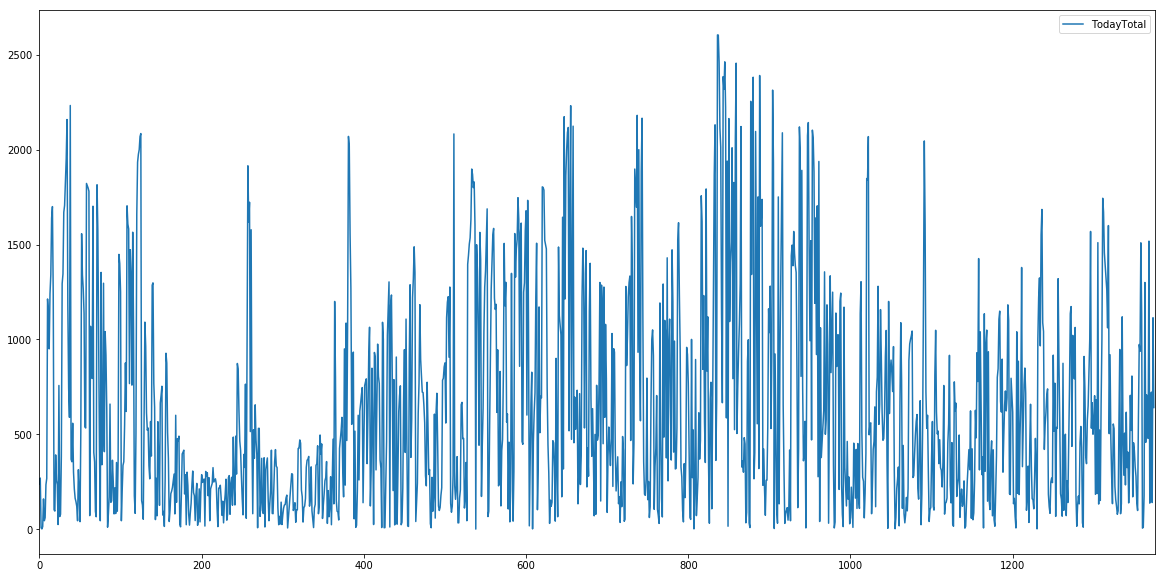

In [282]:
data.plot()
plt.show()

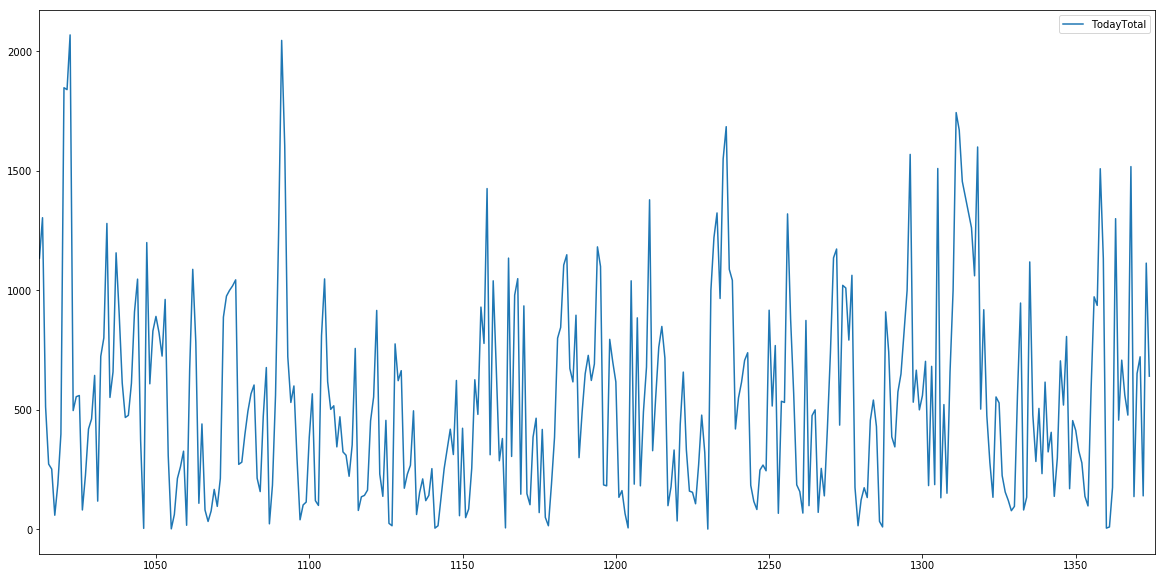

In [283]:
data[-365:].plot() #periode -365 jours
plt.show()

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [285]:
x = df["Date"][:-2]
y = df["TodayTotal"][:-2]
x = x.values.reshape(-1, 1) #Eviter un problème de dimension : 2D array, 1D array 

In [286]:
model = SVR(C=1000)
model.fit(x,y)
model.score(x,y)

prediction = model.predict(x)


C:\Users\zakaria\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [287]:
df1= df[['TodayTotal']][:-2].copy()
df1['Prediction'] = prediction
df1.head(5)

,TodayTotal,Prediction
Date,,
2020-01-04,237.0,268.900067
2020-01-04,269.0,268.900067
2020-01-05,7.0,12.900067
2020-01-05,1.0,12.900067
2020-01-05,13.0,12.900067


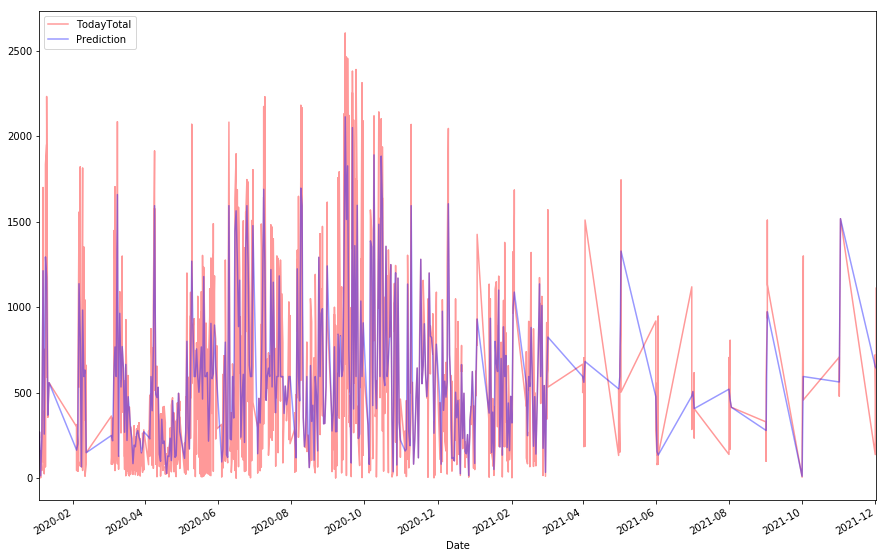

In [288]:
import datetime as dt
df1.plot(alpha=0.4, figsize=(15,10), color=['r','b'])
plt.legend(loc='upper left')
plt.show()

In [309]:
x1 = df["Date"][-365:-2]
y1 = df["TodayTotal"][-365:-2]
x1 = x1.values.reshape(-1, 1) 


In [310]:
model = SVR(C=50000)
model.fit(x1,y1)
model.score(x1,y1)

prediction1 = model.predict(x1)

C:\Users\zakaria\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [311]:
df365= df[['TodayTotal']][-365:-2].copy()
df365['Prediction'] = prediction1
df365.head(5)

,TodayTotal,Prediction
Date,,
2020-11-06,1135.0,1135.099484
2020-11-06,1304.0,1135.099484
2020-11-07,513.0,272.899680
2020-11-07,273.0,272.899680
2020-11-07,252.0,272.899680


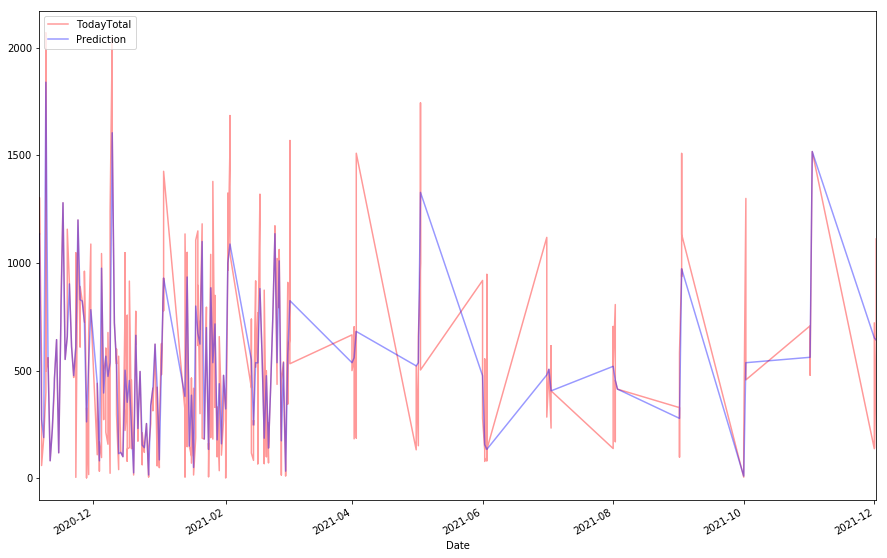

In [312]:
df365.plot(alpha=0.4, figsize=(15,10), color=['r','b'])
plt.legend(loc='upper left')
plt.show()

In [293]:
x2 = df["Date"][:-2]
y2 = df["Total"][:-2]
x2 = x2.values.reshape(-1, 1)

In [294]:
model = SVR(C=50000)
model.fit(x2,y2)
model.score(x2,y2)

prediction2 = model.predict(x2)

C:\Users\zakaria\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [295]:
df2= df[['Total']][:-2].copy()
df2['Prediction'] = prediction2
df2.head(20)


,Total,Prediction
Date,,
2020-01-04,11462.0,12286.783334
2020-01-04,11494.0,12286.783334
2020-01-05,22094.0,22100.100082
2020-01-05,22088.0,22100.100082
2020-01-05,22100.0,22100.100082
2020-01-05,22246.0,22100.100082
2020-01-06,49810.0,50000.100131
2020-01-06,49826.0,50000.100131
2020-01-06,50000.0,50000.100131


In [296]:
df2.tail()

,Total,Prediction
Date,,
2021-12-01,10064.0,10134.099984
2021-12-01,10134.0,10134.099984
2021-12-02,47479.0,48452.900131
2021-12-02,48453.0,48452.900131
2021-12-02,47980.0,48452.900131


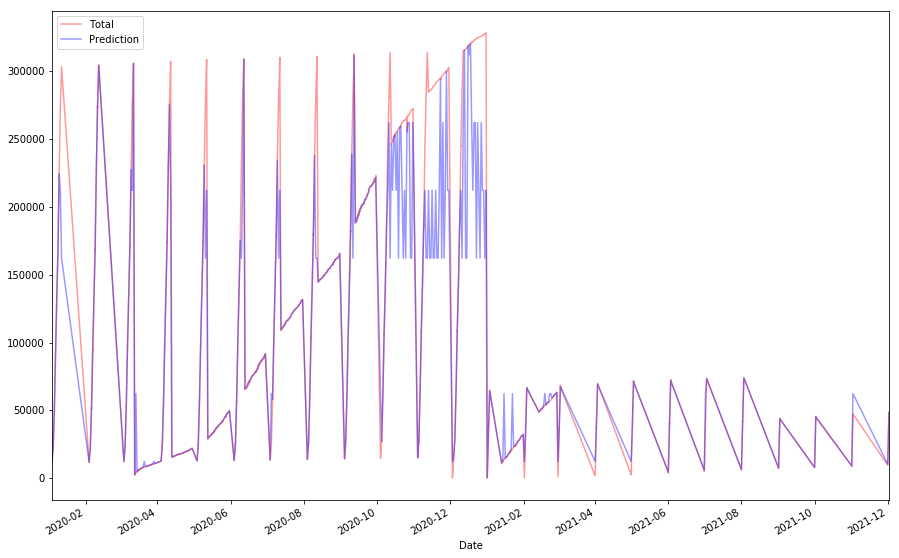

In [297]:
import datetime as dt
df2.plot(alpha=0.4, figsize=(15,10), color=['r','b'])
plt.legend(loc='upper left')
plt.show()